# **(HACKATHON 1 HEALTH INSURANCE)**

## Objectives

*  "Fetch data from Kaggle ( https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance ) and save as raw data" 
*  "Clean and transform data" 
*  "Engineer features for modelling and visualisation"

## Inputs

* This dataset contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges.
* Raw data: csv.file /1 File/Columns:8, Rows:1339 headers and index included

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

#                                                              Section 1- DATA CLEANING

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
df = pd.read_csv(r'C:\\Users\lilia\Documents\LP\Data AI\Hackathons\H1_HealtInsurance\H1_HealthInsurance\data\inputs\raw\insurance.csv')

#Check data type: object, float, etc & View a summary of the data frame 

In [73]:

df.info()  
df.describe() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#Sample of first few rows

In [74]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#Count of missing values per column

In [75]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#Round values for bmi and charges to 2 decimal numbers

In [76]:
df['bmi'] = df['bmi'].round(2)
df['charges'] = df['charges'].round(2)

In [77]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
5,31,female,25.74,0,no,southeast,3756.62
6,46,female,33.44,1,no,southeast,8240.59
7,37,female,27.74,3,no,northwest,7281.51
8,37,male,29.83,2,no,northeast,6406.41
9,60,female,25.84,0,no,northwest,28923.14


#Syntax check

In [78]:
print("Unique values in 'sex':", df['sex'].unique())
print("Unique values in 'smoker':", df['smoker'].unique())
print("Unique values in 'region':", df['region'].unique())

Unique values in 'sex': ['female' 'male']
Unique values in 'smoker': ['yes' 'no']
Unique values in 'region': ['southwest' 'southeast' 'northwest' 'northeast']


#New column BMI ctg

In [79]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Healthy range'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    elif 30 <= bmi <= 39.9:
        return 'Obesity'
    else:
        return 'Severe obesity'


df['bmi_ctg'] = df['bmi'].apply(categorize_bmi)


print(df[['bmi', 'bmi_ctg']].head(15))

      bmi         bmi_ctg
0   27.90      Overweight
1   33.77         Obesity
2   33.00         Obesity
3   22.70   Healthy range
4   28.88      Overweight
5   25.74      Overweight
6   33.44         Obesity
7   27.74      Overweight
8   29.83      Overweight
9   25.84      Overweight
10  26.22      Overweight
11  26.29      Overweight
12  34.40         Obesity
13  39.82         Obesity
14  42.13  Severe obesity


In [80]:
df.head(10)


,age,sex,bmi,children,smoker,region,charges,bmi_ctg
0,19,female,27.90,0,yes,southwest,16884.92,Overweight
1,18,male,33.77,1,no,southeast,1725.55,Obesity
2,28,male,33.00,3,no,southeast,4449.46,Obesity
3,33,male,22.70,0,no,northwest,21984.47,Healthy range
4,32,male,28.88,0,no,northwest,3866.86,Overweight
5,31,female,25.74,0,no,southeast,3756.62,Overweight
6,46,female,33.44,1,no,southeast,8240.59,Obesity
7,37,female,27.74,3,no,northwest,7281.51,Overweight
8,37,male,29.83,2,no,northeast,6406.41,Overweight
9,60,female,25.84,0,no,northwest,28923.14,Overweight


# Save Cleaned Data

In [81]:
df.to_csv('cleaned_healthcare_insurance.csv', index=False)


In [82]:
import pandas as pd
import numpy as np

In [83]:
df_cleaned = pd.read_csv('cleaned_healthcare_insurance.csv')


In [84]:
df_cleaned.head(10)

,age,sex,bmi,children,smoker,region,charges,bmi_ctg
0,19,female,27.90,0,yes,southwest,16884.92,Overweight
1,18,male,33.77,1,no,southeast,1725.55,Obesity
2,28,male,33.00,3,no,southeast,4449.46,Obesity
3,33,male,22.70,0,no,northwest,21984.47,Healthy range
4,32,male,28.88,0,no,northwest,3866.86,Overweight
5,31,female,25.74,0,no,southeast,3756.62,Overweight
6,46,female,33.44,1,no,southeast,8240.59,Obesity
7,37,female,27.74,3,no,northwest,7281.51,Overweight
8,37,male,29.83,2,no,northeast,6406.41,Overweight
9,60,female,25.84,0,no,northwest,28923.14,Overweight


# Stage2- DATA VISUALISATION

In [85]:
import plotly.express as px
import plotly.graph_objects as go



#Descriptive visualisation

In [86]:
avg_charges_by_bmi = df_cleaned.groupby('bmi_ctg', as_index=False)['charges'].mean()
fig = px.line(avg_charges_by_bmi, x='bmi_ctg', y='charges',
              title='Average Insurance Charges by BMI Category',
              labels={'charges': 'Avg Charges (£)', 'bmi_ctg': 'BMI Category'})
fig.show()



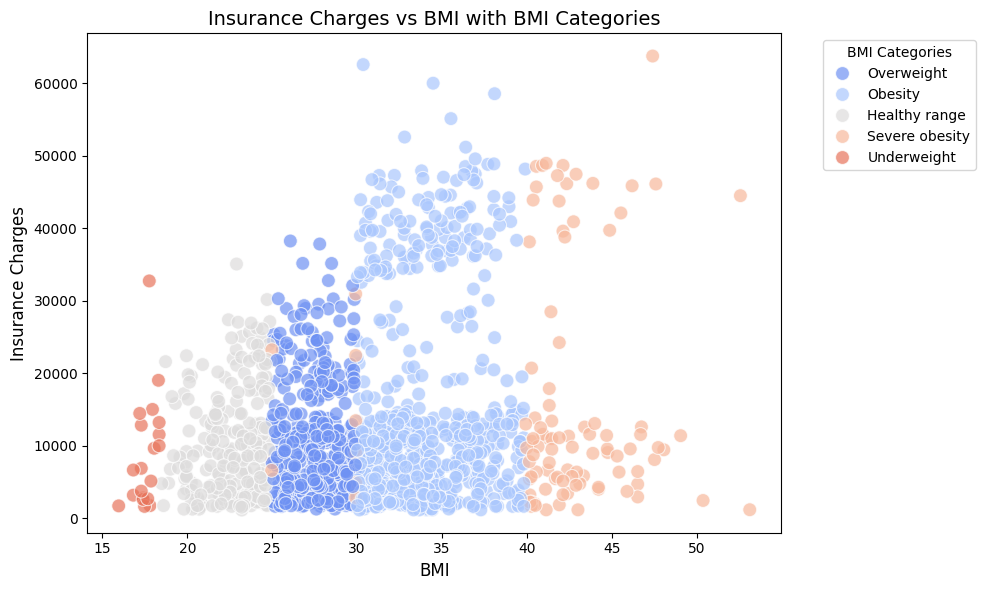

In [87]:

plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(x='bmi', y='charges', hue='bmi_ctg', palette='coolwarm', data=df, s=100, alpha=0.7)

# Customize the plot
plt.title('Insurance Charges vs BMI with BMI Categories', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Insurance Charges', fontsize=12)
plt.legend(title='BMI Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

In [88]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load dataset (adjust path as needed)
df_cleaned = pd.read_csv('cleaned_healthcare_insurance.csv')

# Precompute averages
avg_charges_by_age = df_cleaned.groupby('age', as_index=False)['charges'].mean()
avg_charges_by_gender = df_cleaned.groupby('sex', as_index=False)['charges'].mean()
avg_charges_by_region = df_cleaned.groupby('region', as_index=False)['charges'].mean()

# Create subplot figure with 1 row and 3 columns
fig = make_subplots(rows=1, cols=3, subplot_titles=[
    "Avg Charges by Age",
    "Avg Charges by Gender",
    "Avg Charges by Region"
])

# Add line chart (age)
fig.add_trace(
    go.Scatter(x=avg_charges_by_age['age'], y=avg_charges_by_age['charges'],
               mode='lines+markers', name='Age'),
    row=1, col=1
)

# Add bar chart (gender)
fig.add_trace(
    go.Bar(x=avg_charges_by_gender['sex'], y=avg_charges_by_gender['charges'], name='Gender'),
    row=1, col=2
)

# Add bar chart (region)
fig.add_trace(
    go.Bar(x=avg_charges_by_region['region'], y=avg_charges_by_region['charges'], name='Region'),
    row=1, col=3
)

# Update layout
fig.update_layout(height=400, width=1200, title_text="Descriptive Statistics: Insurance Charges")
fig.update_yaxes(title_text="Avg Charges (£)", row=1, col=1)
fig.update_yaxes(title_text="Avg Charges (£)", row=1, col=2)
fig.update_yaxes(title_text="Avg Charges (£)", row=1, col=3)
fig.show()


#Correlation Analysis

In [89]:
corr_matrix = df_cleaned.corr(numeric_only=True)
fig = px.imshow(corr_matrix, text_auto=True,
                title='Correlation Heatmap of Features (Including Charges)',
                color_continuous_scale='RdBu', zmin=-1, zmax=1)
fig.show()


#Grouped Predictive Analysis Chart

In [90]:
df_cleaned = pd.read_csv('cleaned_healthcare_insurance.csv')
df_cleaned.head(10)

,age,sex,bmi,children,smoker,region,charges,bmi_ctg
0,19,female,27.90,0,yes,southwest,16884.92,Overweight
1,18,male,33.77,1,no,southeast,1725.55,Obesity
2,28,male,33.00,3,no,southeast,4449.46,Obesity
3,33,male,22.70,0,no,northwest,21984.47,Healthy range
4,32,male,28.88,0,no,northwest,3866.86,Overweight
5,31,female,25.74,0,no,southeast,3756.62,Overweight
6,46,female,33.44,1,no,southeast,8240.59,Obesity
7,37,female,27.74,3,no,northwest,7281.51,Overweight
8,37,male,29.83,2,no,northeast,6406.41,Overweight
9,60,female,25.84,0,no,northwest,28923.14,Overweight


In [91]:
%pip install statsmodels

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm



df_cleaned = pd.read_csv('cleaned_healthcare_insurance.csv')

# Create subplots: 1 row, 3 columns
fig = make_subplots(rows=1, cols=3, subplot_titles=[
    'Charges vs Age (Smoker)',
    'Charges vs BMI (Gender)',
    'Charges vs Children'
])

# --- Charges vs Age (with smoker) ---
scatter1 = px.scatter(df_cleaned, x='age', y='charges', color='smoker', trendline='ols')
for trace in scatter1.data:
    fig.add_trace(trace, row=1, col=1)

# --- Charges vs BMI (with gender) ---
scatter2 = px.scatter(df_cleaned, x='bmi', y='charges', color='sex', trendline='ols')
for trace in scatter2.data:
    fig.add_trace(trace, row=1, col=2)

# --- Charges vs Number of Children ---
scatter3 = px.scatter(df_cleaned, x='children', y='charges', color='smoker', trendline='ols')
for trace in scatter3.data:
    fig.add_trace(trace, row=1, col=3)

# Layout
fig.update_layout(height=500, width=1300, title_text="Predictive Analysis: Estimating Insurance Charges")
fig.update_yaxes(title_text="Charges ($)", row=1, col=1)
fig.update_xaxes(title_text="Age", row=1, col=1)
fig.update_xaxes(title_text="BMI", row=1, col=2);
fig.update_xaxes(title_text="Children", row=1, col=3);
fig.show()


Note: you may need to restart the kernel to use updated packages.


# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [92]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\lilia\\Documents\\LP\\Data AI\\Hackathons\\H1_HealtInsurance'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [93]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [94]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\lilia\\Documents\\LP\\Data AI\\Hackathons'

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [95]:
import osexcept Exception as e:s e:
  print(e)


SyntaxError: invalid syntax (633730164.py, line 1)